In [1]:
import cv2 as cv

In [ ]:
import kagglehub

# Enable debugging logs
import logging
logging.basicConfig(level=logging.DEBUG)

try:
    path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")
    print("Path to dataset files:", path)
except Exception as e:
    print("Error:", e)


In [4]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5"

if os.path.exists(dataset_path):
    print("Dataset found!")
    print("Files:", os.listdir(dataset_path))
else:
    print("Dataset not found.")


Dataset found!
Files: ['name of the animals.txt', 'animals']


In [5]:
# move dataset to the path '/content/dataset'
!cp -r /root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5 /content/dataset


In [6]:
import os
print(os.listdir("/content/dataset"))


['name of the animals.txt', 'animals']


# **Reading Images**

In [8]:
img = cv.imread("./dataset/animals/animals/butterfly/016caf0681.jpg")

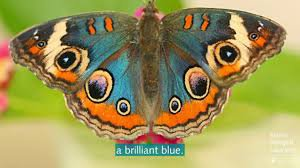

-1

In [12]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv.waitKey(0) #keyboard binary function which waits for a delay until a key is pressed

# **Reding videos**

In [19]:
import cv2
import os

# Path to the uploaded video (change the filename accordingly)
video_path = "./cat-video.mp4"  # Update with your actual filename

# Create a folder to store frames
frames_folder = "extracted_frames"
os.makedirs(frames_folder, exist_ok=True)

# Open the video
cap = cv2.VideoCapture(video_path)

frame_count = 0
frame_interval = 30  # Extract every 30th frame

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Stop if video ends

    if frame_count % frame_interval == 0:
        frame_filename = os.path.join(frames_folder, f"frame_{frame_count}.jpg")
        cv2.imwrite(frame_filename, frame)  # Save frame

    frame_count += 1

cap.release()
print(f"Frames saved in '{frames_folder}' folder!")


Frames saved in 'extracted_frames' folder!


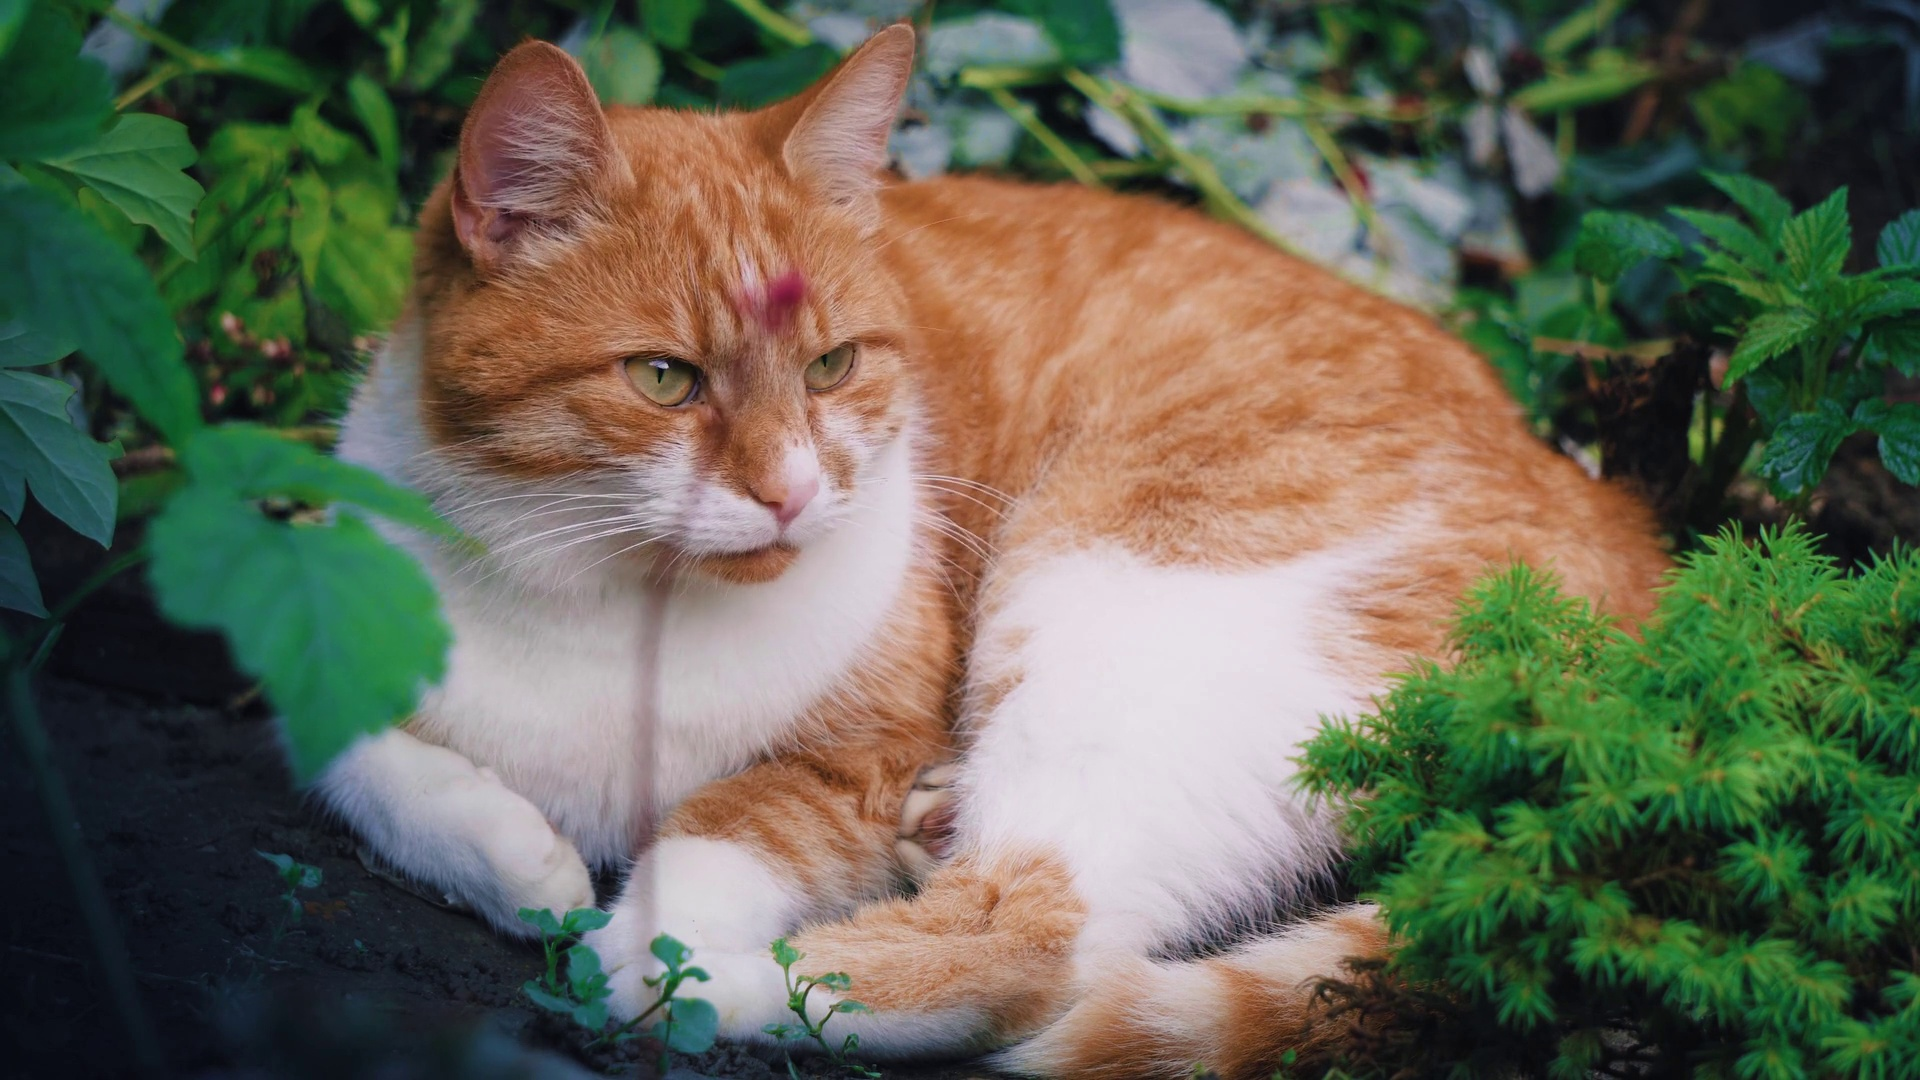

In [20]:
from google.colab.patches import cv2_imshow
import glob

# Get a list of extracted frames
frames = sorted(glob.glob(f"{frames_folder}/*.jpg"))

# Show a sample frame
if frames:
    sample_frame = frames[len(frames) // 2]  # Show middle frame
    img = cv2.imread(sample_frame)
    cv2_imshow(img)
else:
    print("No frames found.")
